In [1]:
###density-density dielectric function, vasp5.4.4
def get_dielect(filename, nedos):
    """
    LOPTICS parsing:
    filename: OUTCAR file
    returns energy and imaginery part of epsilon, real part of epsilon
    """  
    import re
    import numpy as np

    i = -4
    data = np.zeros((nedos, 3))
    with open(filename) as f:
        for line in f:
            if 'IMAGINARY' in line.split() and 'density-density' in line.split():
                i = -3
            if i in [-3, -2, -1]:
                i += 1 
                continue
            if i == nedos:
                break
            if i >= 0:
                data[i][0] = float(line.split()[0])
                data[i][1] = float(line.split()[1])
                i += 1

    i = -4
    with open(filename) as f:
        for line in f:
            if 'REAL' in line.split() and 'density-density' in line.split():
                i = -3
            if i in [-3, -2, -1]:
                i += 1 
                continue
            if i == nedos:
                break
            if i >= 0:
                data[i][2] = float(line.split()[1])
                i += 1             
    return np.transpose(data)

def get_absorb(filename, nedos):
    """
    LOPTICS parsing:
    filename: OUTCAR
    returns energy and absorption coefficient
    """ 
    from pymatgen.core.physical_constants import c,h,e
    from math import sqrt,pi
    import numpy as np
    data = get_dielect(filename, nedos)
    energy = data[0]
    imag_iso = data[1]
    real_iso = data[2]
    constant = 4*pi*e/(h*c)*0.01 
    norm_iso = np.zeros(nedos)
    k_iso = np.zeros(nedos)
    absorb_iso = np.zeros(nedos)
    for i in range(nedos):
        norm_iso[i] = sqrt(imag_iso[i]**2+real_iso[i]**2)
        k_iso[i] = sqrt(2)/2*sqrt(norm_iso[i]-real_iso[i])
        absorb_iso[i] = energy[i]*k_iso[i]*constant
    return energy, absorb_iso


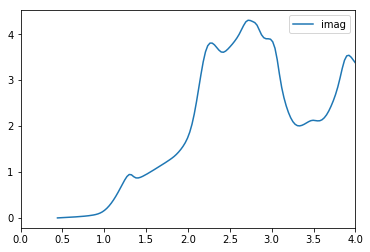

In [2]:
import matplotlib.pyplot as plt
data = get_dielect('/Users/yao/Google Drive/data/2116/absorption2/Cs2In1Bi1Cl6/OUTCAR', 2000)
plt.plot(data[0]+0.44079999999999997, data[1], label='imag')
#plt.plot(data[0], data[2], label='real')
plt.legend()

plt.xlim([0,4])
plt.show()

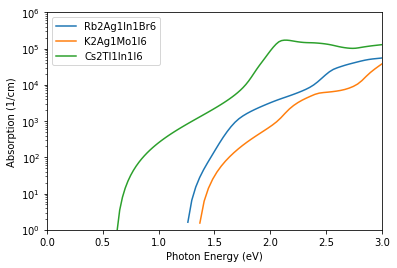

In [3]:
energy, absorb_iso = get_absorb('/Users/yao/Google Drive/data/2116/absorption/Rb2Ag1In1Br6/k10-ip/OUTCAR', 2000)
plt.semilogy(energy+1.46-0.2334, absorb_iso, label='Rb2Ag1In1Br6') #band gap calculatio from Yu&Zunger paper

energy, absorb_iso = get_absorb('/Users/yao/Google Drive/data/2116/absorption/K2Ag1Mo1I6/k10-ip/OUTCAR', 2000)
plt.semilogy(energy+1.5814-0.2502, absorb_iso, label='K2Ag1Mo1I6')

energy, absorb_iso = get_absorb('/Users/yao/Google Drive/data/2116/absorption2/Cs2Tl1In1I6/OUTCAR', 2000)
plt.semilogy(energy+1.3968-0.7949, absorb_iso, label='Cs2Tl1In1I6')

plt.xlim([0, 3])
plt.ylim([1, 1000000])
plt.legend()
plt.ylabel('Absorption (1/cm)')
plt.xlabel('Photon Energy (eV)')

#plt.savefig('/Users/yao/Google Drive/data/2116/2116 figure/full_data/absorption.pdf')
plt.show()  

0.4963
0.7454000000000001
0.6104999999999999
0.6488


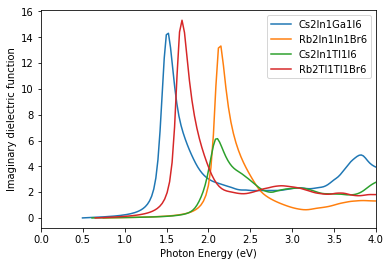

In [18]:
scissor_file = '/Users/yao/Google Drive/data/2116/data/scissor'
scissor_dict = {}
with open(scissor_file, 'r') as f:
    for line in f:
        scissor_dict[line.split()[0]] = float(line.split()[1])
#for c in scissor_dict:   
#for c in ['Cs2Ag1In1Br6', 'Rb2In1As1Cl6', 'Rb2In1Sb1Cl6', 'Rb2In1Bi1Cl6',\
#          'Cs2Ag1Sb1I6', 'Cs2Cu1Bi1Br6', 'Cs2Au1Sc1I6', 'Cs2In1Ga1I6', 'Cs2In1In1Br6', 'Cs2In1Tl1I6']:
#for c in ['K2Ag1In1Cl6', 'Rb2Ag1In1Cl6', 'Rb2Ag1In1Br6', 'Cs2Ag1In1Cl6', 'Cs2Ag1In1Br6']: #1
#for c in ['Rb2In1As1Cl6', 'Cs2In1Bi1Cl6', 'Rb2In1Sb1Cl6', 'Rb2Tl1As1Br6', 'Cs2Tl1Bi1I6', 'Cs2Tl1Sb1Br6']: #2
#for c in ['Rb2Ag1Sb1I6', 'Cs2Ag1Sb1I6', 'Cs2Au1As1Cl6', 'Rb2Au1Sb1Cl6']: #3
#for c in ['K2Au1Sc1I6', 'Rb2Au1Sc1I6', 'Cs2Au1Sc1I6']: #4
for c in ['Cs2In1Ga1I6', 'Rb2In1In1Br6', 'Cs2In1Tl1I6', 'Rb2Tl1Tl1Br6']: #5
    try:
        data = get_dielect('/Users/yao/Google Drive/data/2116/absorption2/'+c+'/OUTCAR', 2000)
        plt.plot(data[0]+scissor_dict[c], data[1], label=c)
        print(scissor_dict[c])
    except:
        print(c+' calculation not finished')
plt.xlim([0, 4])
#plt.ylim([0, 3])
plt.legend()
plt.ylabel('Imaginary dielectric function')
plt.xlabel('Photon Energy (eV)')

plt.savefig('/Users/yao/Google Drive/data/2116/2116 figure/full_data/imaginary5.pdf')
plt.show()

In [5]:
def nm_to_eV(a):
    h = 6.62607004e-34
    c = 299792458
    e = 1.60217662e-19
    return h*c/(a*1e-9)/e
def nm_to_J(a):
    h = 6.62607004e-34
    c = 299792458
    return h*c/(a*1e-9)
def get_photon_number(energy, photon):
    photon = nm_to_J(photon)
    return energy/photon
def get_sun():
    import pandas as pd
    import numpy as np
    from scipy.integrate import simps
    a = pd.read_csv("//Users/yao/Google Drive/data/2116/ASTMG173.csv")
    a = a.convert_objects(convert_numeric=True)
    photon = a.iloc[1:,0].values #nm
    spectra = a.iloc[1:,2].values #W/(m2*nm)
    get_photon_number_v = np.vectorize(get_photon_number) 
    spectra_photon = get_photon_number_v(spectra, photon) #1/(m2*nm*s)
    integral = simps(spectra_photon, photon) #1/(m2*s)
    return photon, spectra_photon, integral
def get_blackbody_per_wavelength(photon_nm): #photon in nm
    from math import exp
    h = 6.62607004e-34
    c = 299792458
    kB = 1.38064852e-23
    T = 300
    photon_J = nm_to_J(photon_nm)
    return 2/h**3/c**2*photon_J**2*exp(-photon_J/kB/T)*photon_J/photon_nm
    #return 2/h**3/c**2*photon_J**2*exp(-photon_J/kB/T)*photon_J/photon_nm*photon_J/1000
    
#photon, spectra_photon, integral = get_sun()

In [6]:
##for testing
#photon = np.linspace(1, 3000, 3000)
#get_blackbody_per_wavelength_v = np.vectorize(get_blackbody_per_wavelength)
#radiance = get_blackbody_per_wavelength_v(photon)
#plt.plot(photon, radiance)
#plt.show()